# SIG720 - Machine Learning
## Task P3 (Pass Task 3)

Submitted by - <i>Surya Pradeep Kumar Varma</i><br>
Deakin ID - <b>223020011</b><br>
Target Grade - <b>P (Pass Task)</b><br>
Email Address - <b>suryapradeepv@gmail.com</b>

# Index

[1. KNN Classification on digits Dataset](#1.-KNN-Classification-on-digits-Dataset)<br>
[2. DT on digits Dataset with two splits](#2.-Decision-Tree-Classification-on-digits-Dataset)<br>
[3. KNN Classification on digits Dataset (distance metrics)](#3.-KNN-Classification-on-digits-Dataset-(distance-metrics))<br>

[4. RF on Attrition Datsetl](#4.-Random-Forest-on-HR-Employee-Attrition-dataset)<br>
[5. Gradient Boosting on Attrition Dataset](#5.-Gradient-Boosting-on-HR-Employee-Attrition-Dataset)<br>
[6. Compare Q4 and Q5 Results](#6.-Compare-Results)<br>

[References](#References)

In [1]:
# Import essential libraries

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings


from pprint import pprint
import plotly.figure_factory as ff
import plotly.express as px

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

seed = 7
warnings.filterwarnings('ignore')
%matplotlib inline

# 1. KNN Classification on digits Dataset

### 1.1. Load the Dataset

In [2]:
# Load digits dataset from Sklearn
from sklearn import datasets

dataset = datasets.load_digits()
dataset.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
print(dataset["DESCR"])  # description

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [4]:
pprint(dataset["feature_names"], compact=True)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5',
 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3',
 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1',
 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7',
 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5',
 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3',
 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1',
 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7',
 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5',
 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3',
 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [5]:
X = dataset["data"]
X.shape

(1797, 64)

In [6]:
y = dataset["target"]
y.shape

(1797,)

In [7]:
np.unique(y)  # 10 different classes in target corresponding to the ten single digits

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
df = pd.concat([
    pd.DataFrame(X, columns=dataset["feature_names"]),
    pd.DataFrame(y, columns=["digit"])],
    axis=1)
df

pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0           0.0        0.0        5.0       13.0        9.0        1.0   
1           0.0        0.0        0.0       12.0       13.0        5.0   
2           0.0        0.0        0.0        4.0       15.0       12.0   
3           0.0        0.0        7.0       15.0       13.0        1.0   
4           0.0        0.0        0.0        1.0       11.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        0.0        4.0       10.0       13.0        6.0   
1793        0.0        0.0        6.0       16.0       13.0       11.0   
1794        0.0        0.0        1.0       11.0       15.0        1.0   
1795        0.0        0.0        2.0       10.0        7.0        0.0   
1796        0.0        0.0       10.0       14.0        8.0        1.0   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0           0.0        0.0        0.0        0.0  ...        0.0        0.0   
1           0.0        0.0        0.0        0.0  ...        0.0        0.0   
2           0.0        0.0        0.0        0.0  ...        0.0        0.0   
3           0.0        0.0        0.0        8.0  ...        0.0        0.0   
4           0.0        0.0        0.0        0.0  ...        0.0        0.0   
...         ...        ...        ...        ...  ...        ...        ...   
1792        0.0        0.0        0.0        1.0  ...        0.0        0.0   
1793        1.0        0.0        0.0        0.0  ...        0.0        0.0   
1794        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1795        0.0        0.0        0.0        0.0  ...        0.0        0.0   
1796        0.0        0.0        0.0        2.0  ...        0.0        0.0   

      pixel_7_1  pixel_7_2  pixel_7_3  pixel_7_4  pixel_7_5  pixel_7_6  \
0           0.0        6.0       13.0       10.0        0.0        0.0   
1           0.0        0.0       11.0       16.0       10.0        0.0   
2           0.0        0.0        3.0       11.0       16.0        9.0   
3           0.0        7.0       13.0       13.0        9.0        0.0   
4           0.0        0.0        2.0       16.0        4.0        0.0   
...         ...        ...        ...        ...        ...        ...   
1792        0.0        2.0       14.0       15.0        9.0        0.0   
1793        0.0        6.0       16.0       14.0        6.0        0.0   
1794        0.0        2.0        9.0       13.0        6.0        0.0   
1795        0.0        5.0       12.0       16.0       12.0        0.0   
1796        1.0        8.0       12.0       14.0       12.0        1.0   

      pixel_7_7  digit  
0           0.0      0  
1           0.0      1  
2           0.0      2  
3           0.0      3  
4           0.0      4  
...         ...    ...  
1792        0.0      9  
1793        0.0      0  
1794        0.0      8  
1795        0.0      9  
1796        0.0      8  

[1797 rows x 65 columns]

> all are numerical features (px), and class is categorical variables encoded as an integer

### 1.2. EDA

In [9]:
df.describe().T  # basic descr. stats

count       mean       std  min   25%   50%   75%   max
pixel_0_0  1797.0   0.000000  0.000000  0.0   0.0   0.0   0.0   0.0
pixel_0_1  1797.0   0.303840  0.907192  0.0   0.0   0.0   0.0   8.0
pixel_0_2  1797.0   5.204786  4.754826  0.0   1.0   4.0   9.0  16.0
pixel_0_3  1797.0  11.835838  4.248842  0.0  10.0  13.0  15.0  16.0
pixel_0_4  1797.0  11.848080  4.287388  0.0  10.0  13.0  15.0  16.0
...           ...        ...       ...  ...   ...   ...   ...   ...
pixel_7_4  1797.0  11.809126  4.933947  0.0  10.0  14.0  16.0  16.0
pixel_7_5  1797.0   6.764051  5.900623  0.0   0.0   6.0  12.0  16.0
pixel_7_6  1797.0   2.067891  4.090548  0.0   0.0   0.0   2.0  16.0
pixel_7_7  1797.0   0.364496  1.860122  0.0   0.0   0.0   0.0  16.0
digit      1797.0   4.490818  2.865304  0.0   2.0   4.0   7.0   9.0

[65 rows x 8 columns]

In [10]:
df["digit"].value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: digit, dtype: int64

> **Distribution is completely balanced. All classes in the target are equally distributed**

### 1.3. Preprocessing

In [11]:
# no missing values, no need to impute
na_counts = df.isna().sum()
print(f"Columns with missing values: ", na_counts[na_counts != 0])

Columns with missing values:  Series([], dtype: int64)


In [12]:
X.shape, y.shape

((1797, 64), (1797,))

In [13]:
# split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed, shuffle=True, stratify=y)
X_train.shape, X_test.shape

((1527, 64), (270, 64))

In [14]:
pd.DataFrame(y_train)[0].value_counts()

1    155
3    155
5    155
6    154
4    154
9    153
7    152
0    151
2    150
8    148
Name: 0, dtype: int64

In [15]:
pd.DataFrame(y_test)[0].value_counts()

3    28
4    27
5    27
6    27
2    27
1    27
9    27
7    27
0    27
8    26
Name: 0, dtype: int64

### 1.4. PCA

In [16]:
# Standardize the features 

from sklearn.preprocessing import StandardScaler

# only fit on training set to avoid leakage
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# transform on testing set
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.decomposition import PCA

# Defining the number of principal components to generate
n = X_train.shape[1]

# Storing PCA function with n components
pca = PCA(n_components=n, random_state=seed)

# Applying PCA on scaled data | only training to avoid leakage
X_train_pca = pd.DataFrame(pca.fit_transform(X_train_scaled))
X_test_pca = pd.DataFrame(pca.transform(X_test_scaled))

pca_components = pd.DataFrame(pca.components_)
pca_components.shape

(64, 64)

In [18]:
# The percentage of variance explained by each principal component is stored

var_exp = (pca.explained_variance_ratio_)
pprint(var_exp, compact=True)

array([1.19992619e-01, 9.53373989e-02, 8.50042332e-02, 6.55002055e-02,
       4.95753553e-02, 4.04574805e-02, 3.92211673e-02, 3.46236654e-02,
       3.26611385e-02, 3.03300017e-02, 2.89414318e-02, 2.57797590e-02,
       2.32150877e-02, 2.25566331e-02, 2.15614556e-02, 1.93149673e-02,
       1.76641400e-02, 1.64413449e-02, 1.61270845e-02, 1.48579719e-02,
       1.31352724e-02, 1.29473562e-02, 1.17744319e-02, 1.03682367e-02,
       9.53744025e-03, 9.37134931e-03, 8.42240638e-03, 8.12383715e-03,
       7.90639856e-03, 7.34963856e-03, 7.14030073e-03, 6.92046576e-03,
       6.57894743e-03, 6.28058000e-03, 5.95455580e-03, 5.55009096e-03,
       4.90935057e-03, 4.60761792e-03, 4.22883520e-03, 4.13799450e-03,
       4.01668072e-03, 3.55173619e-03, 3.42774172e-03, 3.27172405e-03,
       3.10228154e-03, 2.85103522e-03, 2.69541182e-03, 2.51267155e-03,
       2.35326177e-03, 2.17608541e-03, 2.02711930e-03, 1.91477700e-03,
       1.79351041e-03, 1.67354666e-03, 1.61941499e-03, 1.48527536e-03,
      

In [19]:
# Cumulative percentage explained by first three components

print(f"Variance explained by first three components: {np.sum(var_exp[:3])*100:.2f}%")

Variance explained by first three components: 30.03%


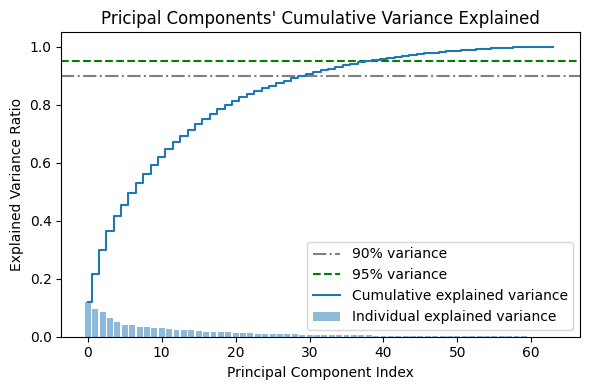

In [20]:
# Cumulative percentage explained by Principal components plot

plt.figure(figsize=(6, 4))

cum_sum_exp = np.cumsum(var_exp)
plt.axhline(y=0.9, color='gray', linestyle='-.', label='90% variance')
plt.axhline(y=0.95, color='green', linestyle='--', label='95% variance')
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_exp)), cum_sum_exp, where='mid',label='Cumulative explained variance')
plt.title("Pricipal Components' Cumulative Variance Explained")
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Component Index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

> This plot shows the cumulative percentage of variance explaiend by each additional principal component. We can see that around **38 principal components are enough to account for 95% of the variance**. Also, around **28 principal components explain 99%** of variance of the data

In [21]:
X_train_pca.shape, X_test_pca.shape

((1527, 64), (270, 64))

In [22]:
# Select first three components

X_train_pca_top3 = X_train_pca[[0, 1, 2]]
X_test_pca_top3 = X_test_pca[[0, 1, 2]]
X_train_pca_top3.head(3)

0         1         2
0  1.313851  0.576306  2.926491
1  1.925591 -2.720883  0.767938
2  1.805145 -2.730037 -2.584975

In [23]:
# Dimensions of the modified dataset
X_train_pca_top3.shape, X_test_pca_top3.shape

((1527, 3), (270, 3))

### 1.5. Visualize

PCA (Principal Component Analysis) is a linear technique that works best with data that has a linear structure. It seeks to identify the underlying principal components in the data by projecting onto lower dimensions, minimizing variance, and preserving large pairwise distancs. PCA focuses on maintaining large pairwise distances to maximize variance. In summary, PCA preserves the variance in the data.

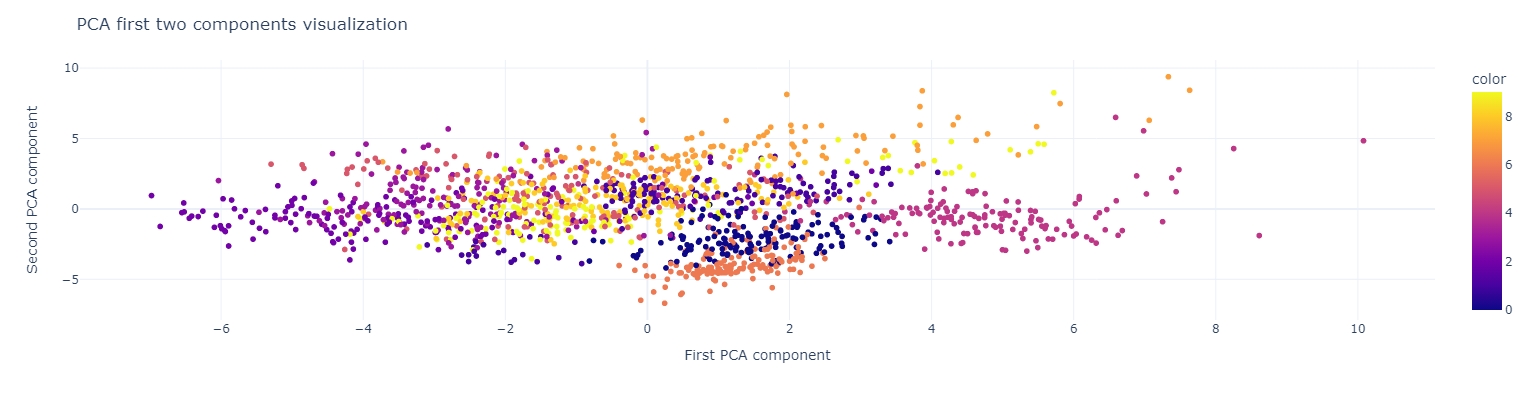

In [24]:
# visualize first two components of PCA w.r.t target variable y

fig = px.scatter(x=X_train_pca_top3[0], y=X_train_pca_top3[1], color=y_train)
fig.update_layout(
    title="PCA first two components visualization",
    xaxis_title="First PCA component",
    yaxis_title="Second PCA component",
    width=800, height=400,
    paper_bgcolor="white",
    autosize=False,
    template='plotly_white'
)

fig.show()

> We can see some sepeartion between classes using just two components

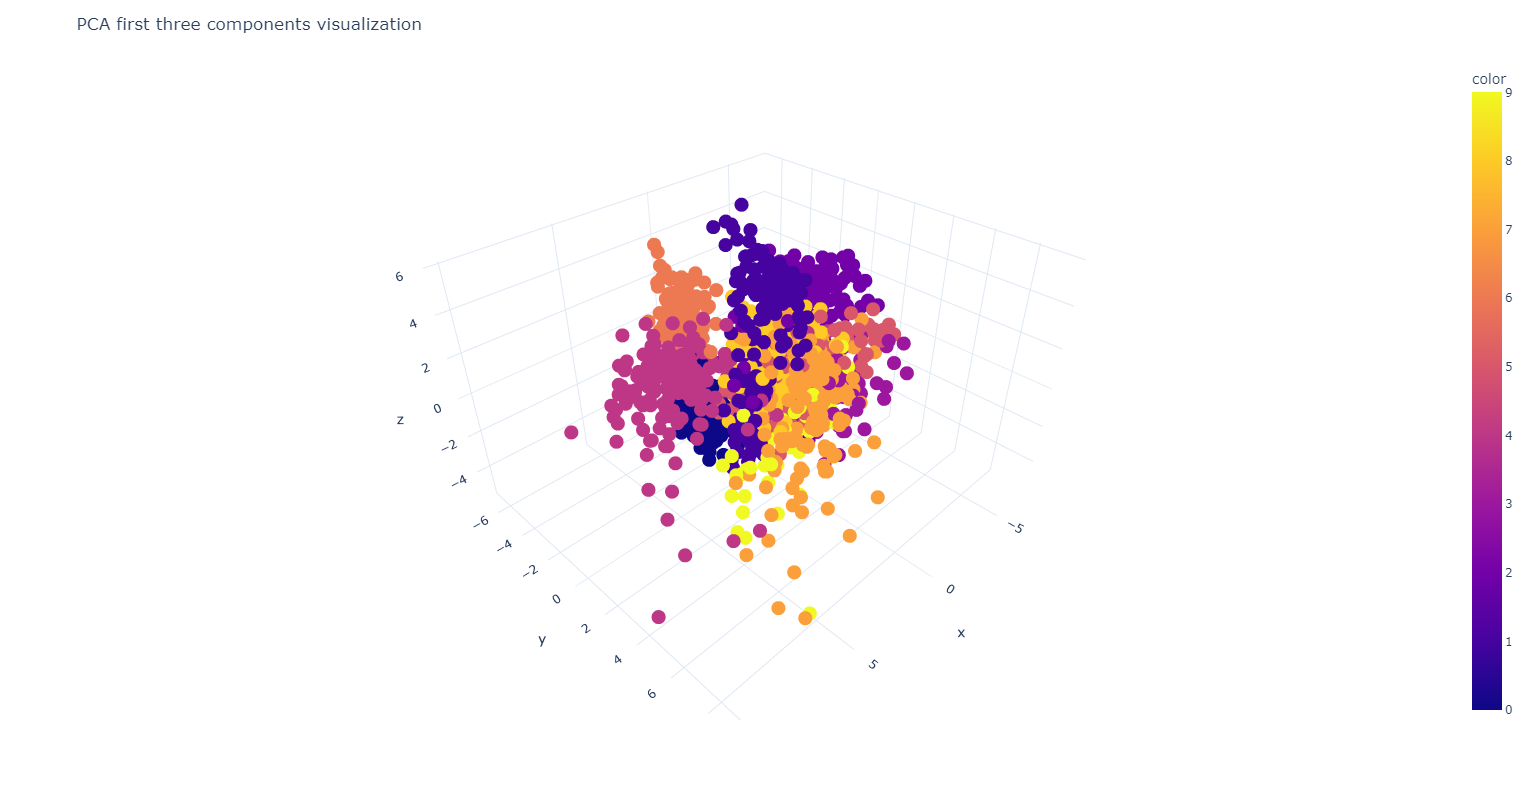

In [25]:
# visualize first three components of t-sne w.r.t target variable y

fig = px.scatter_3d(x=X_train_pca_top3[0], y=X_train_pca_top3[1], z=X_train_pca_top3[2], color=y_train, height=700)

fig.update_layout(
    title="PCA first three components visualization",
    width=800, height=800,
    autosize=True,
    template='plotly_white'
)
fig.show()

> **We can see in the interactive 3d scatter plot that PCA does a relatively better job of separation of the color i.e, the target variable range y in 3 dimensions using just first three components.**

### 1.6. KNN Classification with PCA components

In [26]:
from sklearn.neighbors import KNeighborsClassifier

# Init the KNN classifier
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [27]:
# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20],  # no. of neighbours to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'p': [.5, 1, 1.5, 2],  # power parameter for minkowski distance metric (1=manhattan; 2=euclidean)
    'metric': ['minkowski', 'chebyshev', 'haversine', 'mahalanobis', 'hamming', 'jaccard'],  # distance metric to use
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30, 40],  # Leaf size passed to BallTree or KDTree (tree-based algos)
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train_pca_top3, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: KNeighborsClassifier(leaf_size=10, n_neighbors=7)


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

def eval_classification(X_train, y_pred, y_test):
    y_pred = np.array(y_pred)
    y_test = np.array(y_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Accuracy: {accuracy*100:.3f}%")
    print(f"Precision: {precision*100:.3f}%")
    print(f"Recall: {recall*100:.3f}%")
    print(f"F1-Score: {f1*100:.3f}%")
    # Print the classification report (precision, recall, F1-score, support for each class)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    

def eval_classification_metrics(model, X_train, X_test, y_train, y_test):
    """Compute training and testing metrics"""
    try:
        y_train_pred = model.predict(X_train)
        y_pred = model.predict(X_test)
    except Exception as e:
        print(e)
        return

    # Train set metrics
    print("~"*100, "\nTraining:")
    eval_classification(X_train, y_train_pred, y_train)
    print("~"*100, "\nTesting:")
    # Test set metrics
    eval_classification(X_train, y_pred, y_test)

In [29]:
# Evaluate
eval_classification_metrics(best_model, X_train_pca_top3, X_test_pca_top3, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 80.288%
Precision: 80.045%
Recall: 80.288%
F1-Score: 79.990%
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       151
           1       0.77      0.93      0.84       155
           2       0.88      0.79      0.84       150
           3       0.71      0.73      0.72       155
           4       0.97      0.95      0.96       154
           5       0.58      0.49      0.53       155
           6       0.99      0.99      0.99       154
           7       0.76      0.86      0.81       152
           8       0.64      0.58      0.61       148
           9       0.74      0.75      0.75       153

    accuracy                           0.80      1527
   macro avg       0.80      0.80      0.80      1527
weighted avg       0.80      0.80      0.80      1527

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### 1.7. KNN Classification with all features

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Init the KNN classifier
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [31]:
# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20],  # no. of neighbours to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'p': [.5, 1, 1.5, 2],  # power parameter for minkowski distance metric (1=manhattan; 2=euclidean)
    'metric': ['minkowski', 'chebyshev', 'haversine', 'mahalanobis', 'hamming', 'jaccard'],  # distance metric to use
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30, 40],  # Leaf size passed to BallTree or KDTree (tree-based algos)
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: KNeighborsClassifier(leaf_size=10, n_neighbors=3)


In [32]:
# Evaluate
eval_classification_metrics(best_model, X_train, X_test, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 99.280%
Precision: 99.285%
Recall: 99.280%
F1-Score: 99.279%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       0.97      1.00      0.99       155
           2       1.00      1.00      1.00       150
           3       0.99      0.99      0.99       155
           4       0.99      1.00      1.00       154
           5       1.00      0.99      0.99       155
           6       0.99      1.00      1.00       154
           7       0.99      0.99      0.99       152
           8       0.99      0.97      0.98       148
           9       0.99      0.98      0.98       153

    accuracy                           0.99      1527
   macro avg       0.99      0.99      0.99      1527
weighted avg       0.99      0.99      0.99      1527

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### 1.8. Results

> **We see some overfitting issue, but using rbf kernel we are able to use just three principal components to achieve a decent 76.3% accuracy on the out of sample test set. As, we have a balanced set. We can directly use the accuracy metric to judge the performance of the model**

> **We can also see that in both the training and testing set, performance is relatively not good for the digits 3, 5, 8 & 9 dragging the avg. accuracy done by a fair bit. To improve this, we might opt to do data augmentation for these digits or even get more data which would help clearly separate these classes from others**

# 2. Decision Tree Classification on digits Dataset

### 2.1. 50-50 Split

In [33]:
# split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=seed, shuffle=True, stratify=y)
X_train.shape, X_test.shape

((898, 64), (899, 64))

### 2.2. DT Classification with all features (50-50) **(A)**

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Init the DT classifier
dt = DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [35]:
# Define hyperparameters to tune
param_grid = {
    # fuction to measure the quality of a split (gini for gini impurity, and “log_loss” and “entropy” both for the Shannon information gain)
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],  # strategy used to choose the split at each node
    # maximum depth of the tree None, nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples.
    'max_depth': [None, 5, 10, 20, 30, 50],
    # minimum number of samples req. to split a node further
    # If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    'min_samples_split': [2, 5, 10, 20, .01, .05, .1, .2],
    'min_samples_leaf': [1, 2, 4, 8, .01, .02, .05, .1],  # minimum number of samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # no. of features to consider when looking for the best split
    # weights associated with classes
    # If 'None', all classes are considered equally important. If 'balanced', the classes are weighted inversely proportional to their frequencies
    'class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: DecisionTreeClassifier(class_weight='balanced', max_depth=50)


In [36]:
# Evaluate
eval_classification_metrics(best_model, X_train, X_test, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 100.000%
Precision: 100.000%
Recall: 100.000%
F1-Score: 100.000%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       1.00      1.00      1.00        91
           2       1.00      1.00      1.00        89
           3       1.00      1.00      1.00        91
           4       1.00      1.00      1.00        90
           5       1.00      1.00      1.00        91
           6       1.00      1.00      1.00        90
           7       1.00      1.00      1.00        90
           8       1.00      1.00      1.00        87
           9       1.00      1.00      1.00        90

    accuracy                           1.00       898
   macro avg       1.00      1.00      1.00       898
weighted avg       1.00      1.00      1.00       898

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### 2.3. 70-30 Split

In [37]:
# split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed, shuffle=True, stratify=y)
X_train.shape, X_test.shape

((1257, 64), (540, 64))

### 2.4. DT Classification with all features (70-30) **(B)**

In [38]:
from sklearn.tree import DecisionTreeClassifier

# Init the DT classifier
dt = DecisionTreeClassifier()
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [39]:
# Define hyperparameters to tune
param_grid = {
    # fuction to measure the quality of a split (gini for gini impurity, and “log_loss” and “entropy” both for the Shannon information gain)
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],  # strategy used to choose the split at each node
    # maximum depth of the tree None, nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples.
    'max_depth': [None, 5, 10, 20, 30, 50],
    # minimum number of samples req. to split a node further
    # If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    'min_samples_split': [2, 5, 10, 20, .01, .05, .1, .2],
    'min_samples_leaf': [1, 2, 4, 8, .01, .02, .05, .1],  # minimum number of samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # no. of features to consider when looking for the best split
    # weights associated with classes
    # If 'None', all classes are considered equally important. If 'balanced', the classes are weighted inversely proportional to their frequencies
    'class_weight': [None, 'balanced'],
}

grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: DecisionTreeClassifier(max_depth=10, splitter='random')


In [40]:
# Evaluate
eval_classification_metrics(best_model, X_train, X_test, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 97.693%
Precision: 97.924%
Recall: 97.693%
F1-Score: 97.746%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       124
           1       1.00      0.92      0.96       127
           2       0.98      0.96      0.97       124
           3       0.99      0.96      0.98       128
           4       0.98      1.00      0.99       127
           5       1.00      0.99      1.00       127
           6       1.00      1.00      1.00       127
           7       1.00      0.98      0.99       125
           8       0.84      0.96      0.89       122
           9       1.00      0.99      1.00       126

    accuracy                           0.98      1257
   macro avg       0.98      0.98      0.98      1257
weighted avg       0.98      0.98      0.98      1257

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### 2.5. Results

**We can see a big difference in both the models trained on the different splits**

* 1. Although both have 100% training accuracy showing overfitting, Model B has much less testing (out-of-sample accuracy) which indicates model B is overfitting a lot more. This might be due to the greater amount of training data given to the decision tree classifier. DT classifier is actually very much inclined to overfitting. This can be improved by pruning the deicison tree or going for a more robust method like Random forest Classification which uses a lot of trees to perform the prediction.
* 2. We have performed hyperparameter tuning for both splits, even though we have obtained similar hyper parameters for both the models, the end performance metrics varies wildly. This shows that the splitting we do obtain the train-dev-test datasets is also a hyperparameter in its own right which needs to be tuned during model training.

# 3. KNN Classification on digits Dataset (distance metrics)

### 3.1. Cosine Metric

> Cosine distance is a measure of similarity between two vectors in a multidimensional space. It calculates the cosine of the angle between the vectors, indicating how closely they align. Lower cosine distance implies greater similarity (closer to 0), while higher values mean more dissimilarity.

In [41]:
# same split as Q1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed, shuffle=True, stratify=y)
X_train.shape, X_test.shape

((1527, 64), (270, 64))

In [42]:
# Init the KNN classifier
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [43]:
# cosine distance metric

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20],  # no. of neighbours to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'p': [.5, 1, 1.5, 2],  # power parameter for minkowski distance metric (1=manhattan; 2=euclidean)
    'metric': ['cosine'],  # distance metric to use
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30, 40],  # Leaf size passed to BallTree or KDTree (tree-based algos)
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: KNeighborsClassifier(leaf_size=10, metric='cosine', n_neighbors=2, p=0.5,
                     weights='distance')


In [44]:
# Evaluate
eval_classification_metrics(best_model, X_train, X_test, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 100.000%
Precision: 100.000%
Recall: 100.000%
F1-Score: 100.000%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       155
           2       1.00      1.00      1.00       150
           3       1.00      1.00      1.00       155
           4       1.00      1.00      1.00       154
           5       1.00      1.00      1.00       155
           6       1.00      1.00      1.00       154
           7       1.00      1.00      1.00       152
           8       1.00      1.00      1.00       148
           9       1.00      1.00      1.00       153

    accuracy                           1.00      1527
   macro avg       1.00      1.00      1.00      1527
weighted avg       1.00      1.00      1.00      1527

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### 3.2. Cityblock metric 

> Cityblock distance, also known as Manhattan distance, is a distance measure between two points in a grid-like space. It is named after the way taxis move along city blocks in a grid-like pattern. It is calculated as the sum of the absolute differences of their coordinates along each dimension.

In [45]:
# Init the KNN classifier
knn = KNeighborsClassifier()
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [46]:
# cityblock distance metric

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [2, 3, 5, 7, 9, 11, 15, 20],  # no. of neighbours to consider
    'weights': ['uniform', 'distance'],  # weight function used in prediction
    'p': [.5, 1, 1.5, 2],  # power parameter for minkowski distance metric (1=manhattan; 2=euclidean)
    'metric': ['cityblock'],  # distance metric to use
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],  # Algorithm used to compute the nearest neighbors
    'leaf_size': [10, 20, 30, 40],  # Leaf size passed to BallTree or KDTree (tree-based algos)
}

grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform the grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Best Model: KNeighborsClassifier(leaf_size=10, metric='cityblock', n_neighbors=2, p=0.5,
                     weights='distance')


In [47]:
# Evaluate
eval_classification_metrics(best_model, X_train, X_test, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 100.000%
Precision: 100.000%
Recall: 100.000%
F1-Score: 100.000%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       151
           1       1.00      1.00      1.00       155
           2       1.00      1.00      1.00       150
           3       1.00      1.00      1.00       155
           4       1.00      1.00      1.00       154
           5       1.00      1.00      1.00       155
           6       1.00      1.00      1.00       154
           7       1.00      1.00      1.00       152
           8       1.00      1.00      1.00       148
           9       1.00      1.00      1.00       153

    accuracy                           1.00      1527
   macro avg       1.00      1.00      1.00      1527
weighted avg       1.00      1.00      1.00      1527

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

### 3.3. Results

> We can see almost similar results when using two different metrics and performing training with hyperparameter tuning. We see very good testing accuracy with both methods. But, cosine metric seems to be marginally better resulting in 98.518 %  over 98.497 % with cityblock distance metric. We see the results a bit better than in Q1 when using these specific distance metrics.

# 4. Random Forest on HR Employee Attrition dataset

### 4.1. Load the Data

In [48]:
# import csv
df1 = pd.read_csv("./HR-Employee-Attrition.csv")
df1.head(3)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  

[3 rows x 35 columns]

In [49]:
df1.shape

(1470, 35)

In [50]:
df1.info()  # no missing values, all columns are floating points

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [51]:
# column names have an empty space as prefix for each column

df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

### 4.2. EDA

In [52]:
df1.isna().sum()  # no missing values, no need to impute

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [53]:
df1.describe()  # basic descr. stats

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [54]:
# EmployeeCount has zero variance, and adds no predictive power to the model

df1["EmployeeCount"].value_counts()

1    1470
Name: EmployeeCount, dtype: int64

In [55]:
# Also, Over18 seems to be all just a single value.
# This makes sense as all employees generally are over18. This can be removed for our training purpose.
# However, we need to keep in mind that if we get employees who're under 18 in the future
# (maybe interns or freelance). We won't be able to use that information to get the attrition prediction.

df1["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

In [56]:
# EmployeeNumber seems to be just a serial id which doesn't add any predictive power to the model

df1['EmployeeNumber']

0          1
1          2
2          4
3          5
4          7
        ... 
1465    2061
1466    2062
1467    2064
1468    2065
1469    2068
Name: EmployeeNumber, Length: 1470, dtype: int64

In [57]:
# dropping EmployeeNumber and EmployeeCount

df1.drop(["EmployeeNumber", "EmployeeCount", "Over18"], axis=1, inplace=True)

In [58]:
df1.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [59]:
df1.head(5)

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                 1          2  Life Sciences                        2   
1                 8          1  Life Sciences                        3   
2                 2          2          Other                        4   
3                 3          4  Life Sciences                        4   
4                 2          1        Medical                        1   

   Gender  ...  RelationshipSatisfaction  StandardHours  StockOptionLevel  \
0  Female  ...                         1             80                 0   
1    Male  ...                         4             80                 1   
2    Male  ...                         2             80                 0   
3  Female  ...                         3             80                 0   
4    Male  ...                         4             80                 1   

  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                 8                      0               1               6   
1                10                      3               3              10   
2                 7                      3               3               0   
3                 8                      3               3               8   
4                 6                      3               3               2   

   YearsInCurrentRole  YearsSinceLastPromotion YearsWithCurrManager  
0                   4                        0                    5  
1                   7                        1                    7  
2                   0                        0                    0  
3                   7                        3                    0  
4                   2                        2                    2  

[5 rows x 32 columns]

In [60]:
import plotly.figure_factory as ff

def get_correlation_heatmap(df) -> None:
    """
    utility function to check correlations heatmap of
    numerical variables in a dataframe through plotly
    """
    corr = df.corr().round(2)
    mask = np.triu(np.ones_like(corr, dtype=bool))
    df_mask = corr.mask(mask)

    fig = ff.create_annotated_heatmap(z=df_mask.to_numpy(), 
                                      x=df_mask.columns.tolist(),
                                      y=df_mask.columns.tolist(),
                                      colorscale=px.colors.diverging.RdBu,
                                      hoverinfo="none", #Shows hoverinfo for null values
                                      showscale=True, ygap=1, xgap=1
                                     )

    fig.update_xaxes(side="bottom")

    fig.update_layout(
        title_text='Correation Heatmap', 
        title_x=0.5,
        height=900,
        autosize=True,
        xaxis_showgrid=False,
        yaxis_showgrid=False,
        xaxis_zeroline=False,
        yaxis_zeroline=False,
        yaxis_autorange='reversed',
        template='plotly_white'
    )

    # NaN values are not handled automatically and are displayed in the figure
    # So we need to get rid of the text manually
    for i in range(len(fig.layout.annotations)):
        if fig.layout.annotations[i].text == 'nan':
            fig.layout.annotations[i].text = ""

    fig.show()

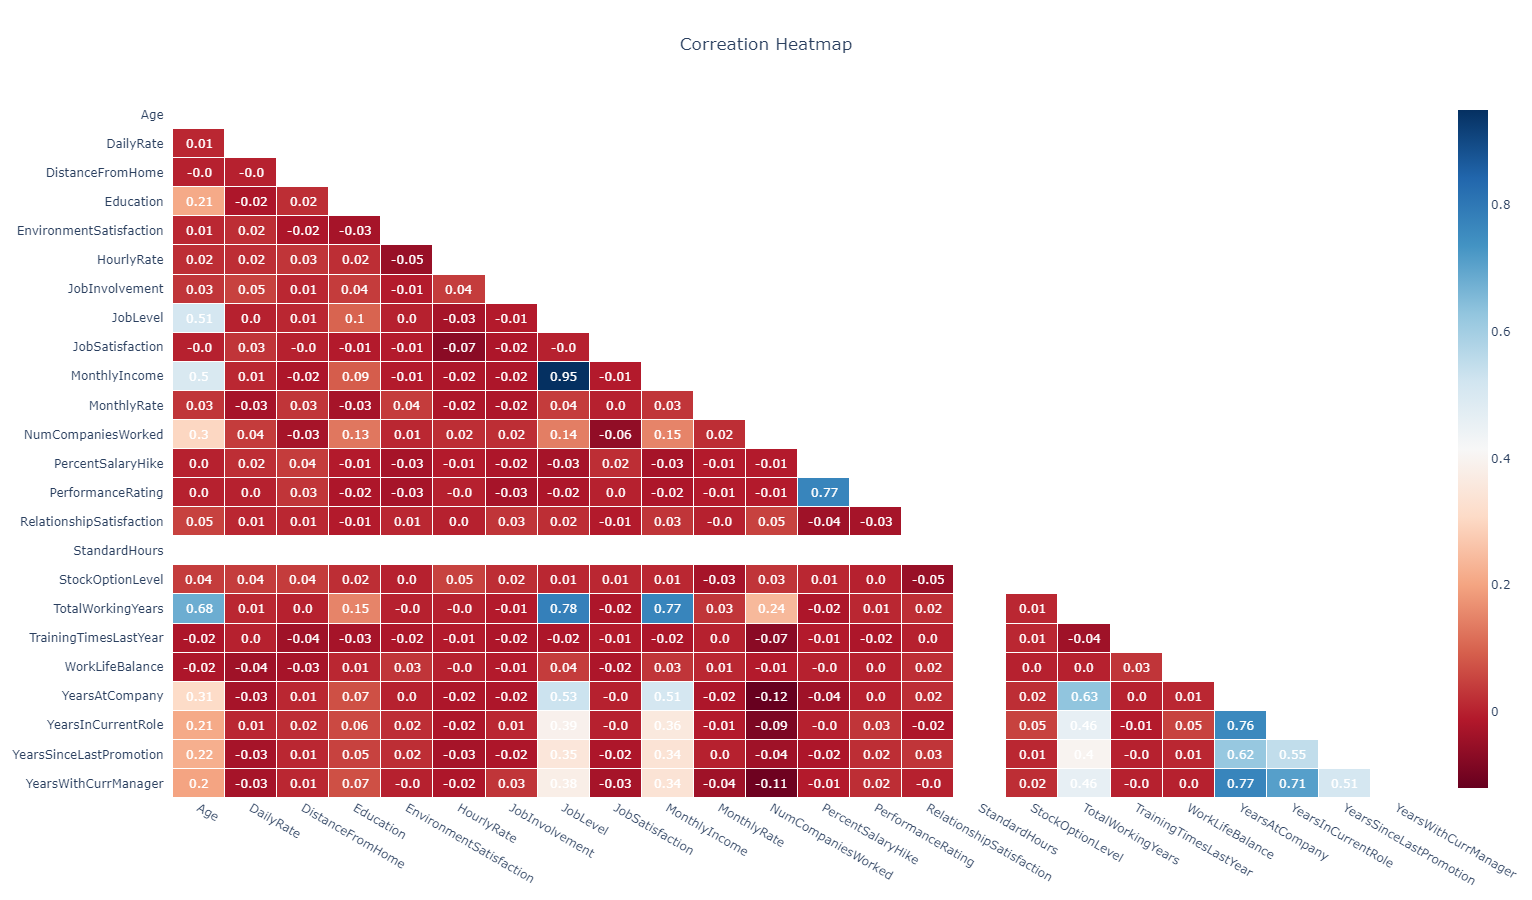

In [61]:
# Check correlations

get_correlation_heatmap(df1)

> The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation

> We can see that a few pairs of variables ahve very highly correlation with each other i.e, variable pairs with absolute correlation value greater than 0.6. This multicollinearity might cause problems in modelling

> Random Forest uses bootstrap sampling and feature sampling, i.e row sampling and column sampling. Therefore Random Forest is not affected by multicollinearity that much since it is picking different set of features for different models and of course every model sees a different set of data points. But there is a chance of multicollinear features getting picked up together, and when that happens we will see some trace of it.

> Feature importance will definitely be affected by multicollinearity. Intuitively, if the features have same effect or there is a relation in between the features, it can be difficult to rank the relative importance of features. In other words, it’s not easy to say which one is even if we can access the underlying effect by measuring more than one variable, or if they are mutual symptoms of a third effect.

Source: https://medium.com/@raj5287/effects-of-multi-collinearity-in-logistic-regression-svm-rf-af6766d91f1b

The potential solutions include the following:

* Remove some of the highly correlated independent variables.
* Linearly combine the independent variables, such as adding them together.

> **Here, we just want to train a random forest model to perform on our dataset in predicting the employe attrition prices. So, we do not need to do anything about multicollinearity as we're not much interested in the relative explanatory power of the predictors.**

In [62]:
# categorical columns

df1.select_dtypes(include=["object"]).head(5)

Attrition     BusinessTravel              Department EducationField  Gender  \
0       Yes      Travel_Rarely                   Sales  Life Sciences  Female   
1        No  Travel_Frequently  Research & Development  Life Sciences    Male   
2       Yes      Travel_Rarely  Research & Development          Other    Male   
3        No  Travel_Frequently  Research & Development  Life Sciences  Female   
4        No      Travel_Rarely  Research & Development        Medical    Male   

                 JobRole MaritalStatus OverTime  
0        Sales Executive        Single      Yes  
1     Research Scientist       Married       No  
2  Laboratory Technician        Single      Yes  
3     Research Scientist       Married      Yes  
4  Laboratory Technician       Married       No

In [63]:
for col in df1.select_dtypes(include=["object"]):
    print(f'{col} {"~"*(50-len(col))}')
    print(df1[col].value_counts(), '\n')

Attrition ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
No     1233
Yes     237
Name: Attrition, dtype: int64 

BusinessTravel ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64 

Department ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64 

EducationField ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64 

Gender ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Male      882
Female    588
Name: Gender, dtype: int64 

JobRole ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representativ

> These all seem to be textual, but they are actually just categorical columns, so we can encode them by one-hot encoding or label encoder. There is also an imbalance in most variables

* Categorical data can be further classified into two main types:
    * Nominal data: Nominal data represents categories or groups with no inherent order or ranking. Examples include colors, genders, types of animals, or countries.

    * Ordinal data: Ordinal data represents categories with a natural order or ranking, but the differences between the categories are not well-defined or uniform. Examples include survey responses with options like "strongly agree," "agree," "neutral," "disagree," and "strongly disagree," where there is a ranking but the numerical difference between the categories is not meaningful.

* Data preprocessing on categorical data involves several important steps to prepare the data for analysis or machine learning algorithms:
    * Label Encoding: For ordinal data, assign numerical values to categories based on their natural order. For nominal data, we can use label encoding to assign unique numerical labels to each category.

    * One-Hot Encoding: For nominal data, we can convert categorical variables into binary vectors, where each category becomes a binary feature (0 or 1). This prevents the model from assuming any ordinal relationship between the categories.

In [64]:
# BusinessTravel seems to be the only ordinal variable

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

# Specify categories to specify the order
ord_encoder = OrdinalEncoder(categories=[['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']])

# reshape to 1d array
business_travel = np.array(df1["BusinessTravel"]).reshape(-1, 1)
print(business_travel.shape)

# encoder then transforms the ordinal data into numerical values (0, 1, and 2) based on the specified order
business_travel = ord_encoder.fit_transform(business_travel)

(1470, 1)


In [65]:
df1["BusinessTravel_Enc"] = business_travel

In [66]:
df1["BusinessTravel"].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [67]:
df1["BusinessTravel_Enc"] = df1["BusinessTravel_Enc"].astype(int)

df1["BusinessTravel_Enc"].value_counts()

1    1043
2     277
0     150
Name: BusinessTravel_Enc, dtype: int64

In [68]:
# drop Businesstravel

df1.drop("BusinessTravel", axis=1, inplace=True)

In [69]:
# Target variable (Attrition) | MEDV: Median value of owner-occupied homes in $1000s

y1 = df1["Attrition"]

y1

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [70]:
y1.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [71]:
y1.value_counts(normalize=True)

No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64

> **Target class is definitely imbalanced. We see ~16% of employee attrition.**

In [72]:
# Get the other columns as features

X1 = df1.drop("Attrition", axis=1)  # features df
X1.head(3)

Age  DailyRate              Department  DistanceFromHome  Education  \
0   41       1102                   Sales                 1          2   
1   49        279  Research & Development                 8          1   
2   37       1373  Research & Development                 2          2   

  EducationField  EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  \
0  Life Sciences                        2  Female          94               3   
1  Life Sciences                        3    Male          61               2   
2          Other                        4    Male          92               2   

   ...  StandardHours StockOptionLevel  TotalWorkingYears  \
0  ...             80                0                  8   
1  ...             80                1                 10   
2  ...             80                0                  7   

  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                     0                1               6                   4   
1                     3                3              10                   7   
2                     3                3               0                   0   

  YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel_Enc  
0                       0                     5                   1  
1                       1                     7                   2  
2                       0                     0                   1  

[3 rows x 31 columns]

In [73]:
# Encoder rest of the categorical variables with One Hot Encoding (Nominal)


# One-hot encode
X1_enc = pd.get_dummies(X1)

# one-hot encoded DataFrame
X1_enc.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Enc', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'JobRole_Healthcare Representative',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager',

In [74]:
X1_enc.shape

(1470, 50)

In [75]:
X1_enc.head(3)

Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   41       1102                 1          2                        2   
1   49        279                 8          1                        3   
2   37       1373                 2          2                        4   

   HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  ...  \
0          94               3         2                4           5993  ...   
1          61               2         2                2           5130  ...   
2          92               2         1                3           2090  ...   

   JobRole_Manufacturing Director  JobRole_Research Director  \
0                               0                          0   
1                               0                          0   
2                               0                          0   

   JobRole_Research Scientist  JobRole_Sales Executive  \
0                           0                        1   
1                           1                        0   
2                           0                        0   

   JobRole_Sales Representative  MaritalStatus_Divorced  \
0                             0                       0   
1                             0                       0   
2                             0                       0   

   MaritalStatus_Married  MaritalStatus_Single  OverTime_No  OverTime_Yes  
0                      0                     1            0             1  
1                      1                     0            1             0  
2                      0                     1            0             1  

[3 rows x 50 columns]

In [76]:
X1_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   DailyRate                          1470 non-null   int64
 2   DistanceFromHome                   1470 non-null   int64
 3   Education                          1470 non-null   int64
 4   EnvironmentSatisfaction            1470 non-null   int64
 5   HourlyRate                         1470 non-null   int64
 6   JobInvolvement                     1470 non-null   int64
 7   JobLevel                           1470 non-null   int64
 8   JobSatisfaction                    1470 non-null   int64
 9   MonthlyIncome                      1470 non-null   int64
 10  MonthlyRate                        1470 non-null   int64
 11  NumCompaniesWorked                 1470 non-null   int64
 12  PercentSalaryHike   

### 4.3. Preprocessing

In [77]:
# split

from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X1_enc, y1, test_size=0.25, random_state=seed, shuffle=True)
X_train.shape, X_test.shape

((1102, 50), (368, 50))

In [78]:
pd.DataFrame(y_train).value_counts()

Attrition
No           921
Yes          181
dtype: int64

In [79]:
pd.DataFrame(y_test).value_counts()

Attrition
No           312
Yes           56
dtype: int64

### 4.4. Training and Hyper-parameter Tuning

In [80]:
# Fit model

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [81]:
# train and visualize scores for different hyperparameters
# we use f1-score instead of accuracy as the target class has imbalance

no_estimators = [2, 5, 10, 20, 30, 50, 75, 100, 150]
metrics = []

for num in no_estimators:
    rfc = RandomForestClassifier(n_estimators=num, random_state=seed)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics.append(f1)
    print('estimators : ', num, "score : ", f1, end="\n")

estimators :  2 score :  0.819796152385145
estimators :  5 score :  0.8155712841253792
estimators :  10 score :  0.8244837641693527
estimators :  20 score :  0.8250703967632738
estimators :  30 score :  0.8225088412731433
estimators :  50 score :  0.8185915225693211
estimators :  75 score :  0.8225088412731433
estimators :  100 score :  0.819796152385145
estimators :  150 score :  0.8119978451947382


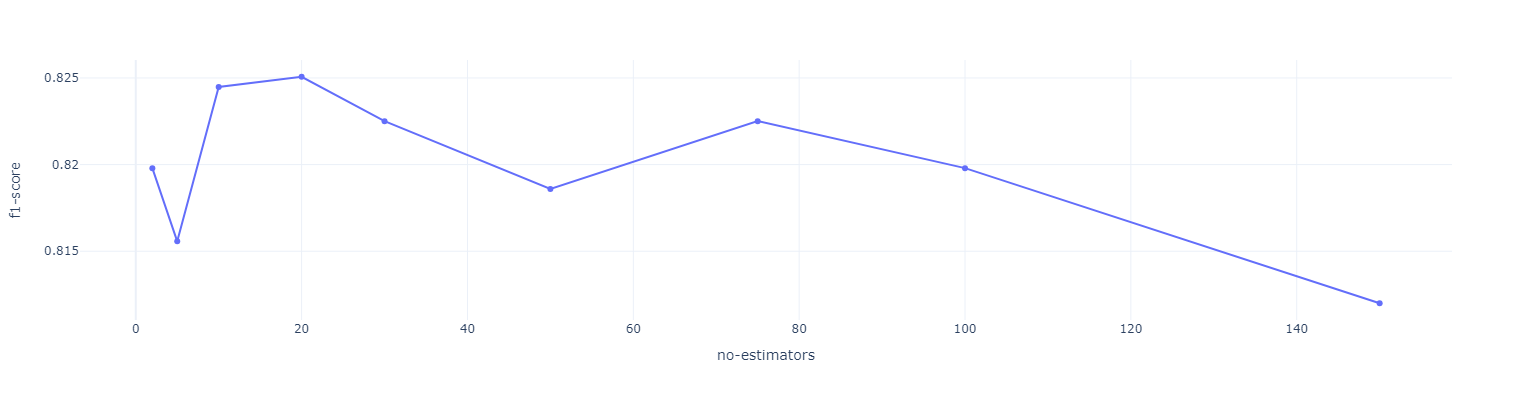

In [82]:
def plot_line(x, title_x):
    df = pd.DataFrame({title_x: x, 'f1-score': metrics})
    fig = px.line(df, x=title_x, y="f1-score", markers=True)
    fig.update_layout(
            height=400,
            width=900,
            autosize=False,
            template='plotly_white'
        )
    fig.show()

plot_line(no_estimators, 'no-estimators')

> No. of estimators is the number of trees we use to make the prediction. If we use a very low number of trees we will have higher overfitting. But, if we use a vast number of trees, we will have some level of underfitting. So, we need to trade off and tune this hyperparameter. We see that we see the best results with 2|0 estimators

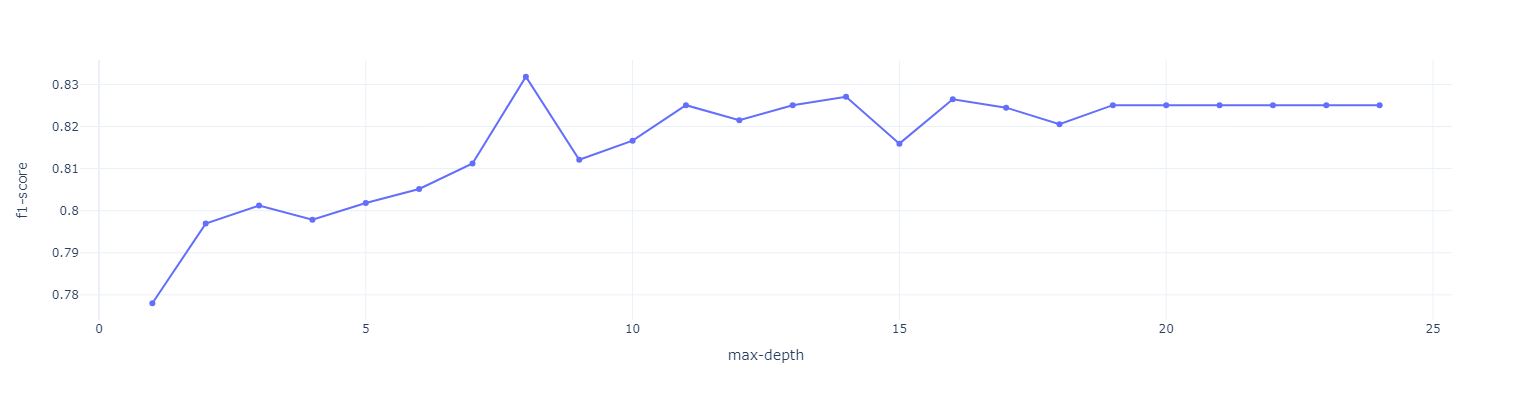

In [83]:
# train and visualize scores for different hyperparameters

max_depth = list(range(1, 25))
metrics = []

for depth in max_depth:
    rfc = RandomForestClassifier(n_estimators=20, random_state=seed, max_depth=depth)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics.append(f1)
    # print('estimators : ', num, "score : ", f1, end="\n")

plot_line(max_depth, 'max-depth')

> max_depth is the maximum depth of each decision tree. Having too much depth might cause the trees to overfit & too little will cause underfitting. We see 8 is the best value here.

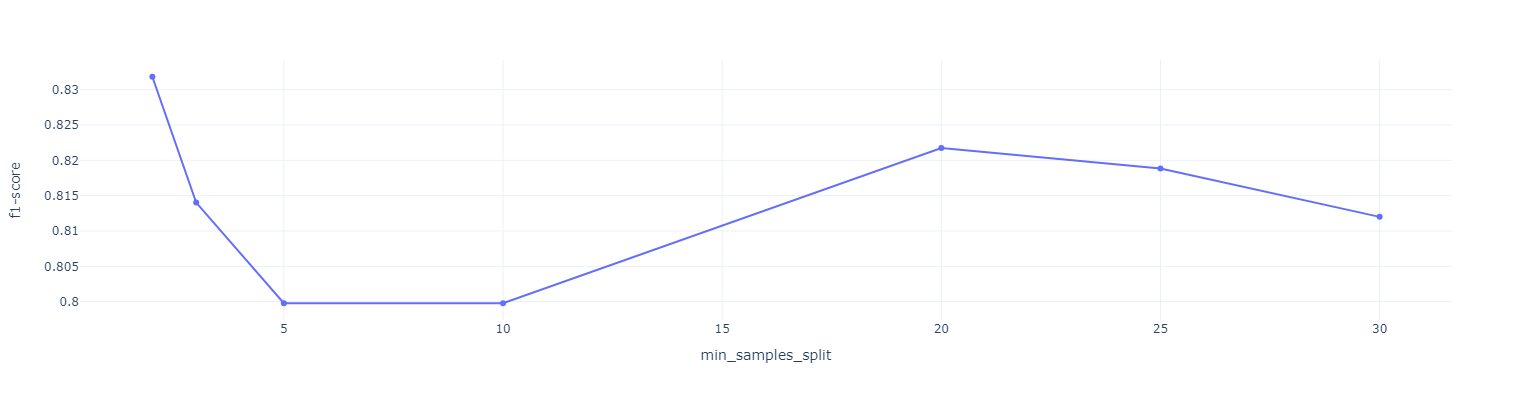

In [84]:
min_samples_split = [2, 3, 5, 10, 20, 25, 30]
metrics = []

for i in min_samples_split:
    rfc = RandomForestClassifier(n_estimators=20, random_state=seed, max_depth=8, min_samples_split=i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics.append(f1)
    # print('estimators : ', num, "score : ", f1, end="\n")

plot_line(min_samples_split, 'min_samples_split')

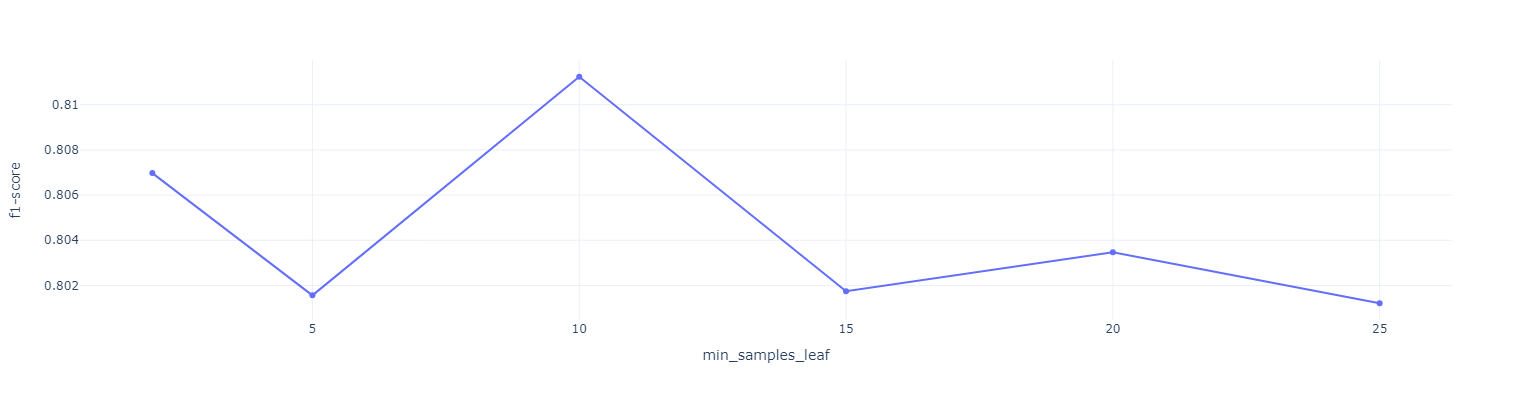

In [85]:
# train and visualize scores for different hyperparameters

min_samples_leaf = [2, 5, 10, 15, 20, 25]
metrics = []

for i in min_samples_leaf:
    rfc = RandomForestClassifier(n_estimators=20, random_state=seed, max_depth=8, min_samples_split=2, min_samples_leaf=i)
    rfc.fit(X_train, y_train)
    y_pred = rfc.predict(X_test)
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics.append(f1)
    # print('estimators : ', num, "score : ", f1, end="\n")

plot_line(min_samples_leaf, 'min_samples_leaf')

In [110]:
# Define all hyperparameters to tune and find best through gridsearch

param_grid = {
    'n_estimators': [10, 20],  # no. of estimator trees
    # fuction to measure the quality of a split (gini for gini impurity, and “log_loss” and “entropy” both for the Shannon information gain)
    'criterion': ['gini', 'entropy', 'log_loss'],
    # maximum depth of the tree None, nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples.
    'max_depth': [5, 7, 9, 10, 15],
    # minimum number of samples req. to split a node further
    # If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    'min_samples_split': [5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 15, 30],  # minimum number of samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # no. of features to consider when looking for the best split
    # weights associated with classes
    # If 'None', all classes are considered equally important. If 'balanced', the classes are weighted inversely proportional to their frequencies
    'class_weight': [None, 'balanced'],
    'bootstrap': [True, False]  # whether to bootstrap (sampling while replacement)
}

rf = RandomForestClassifier(random_state=seed)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv=6, scoring='recall_macro', n_jobs=-1, verbose=True)

# Perform the grid search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Model: RandomForestClassifier(bootstrap=False, class_weight='balanced',
                       criterion='log_loss', max_depth=15, max_features='log2',
                       min_samples_leaf=30, min_samples_split=30,
                       n_estimators=20, random_state=7)


### 4.5. Evaluation

In [111]:
# Evaluate
eval_classification_metrics(best_model, X_train, X_test, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 83.575%
Precision: 88.366%
Recall: 83.575%
F1-Score: 85.008%
Classification Report:
               precision    recall  f1-score   support

          No       0.96      0.84      0.90       921
         Yes       0.50      0.82      0.62       181

    accuracy                           0.84      1102
   macro avg       0.73      0.83      0.76      1102
weighted avg       0.88      0.84      0.85      1102

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Testing:
Accuracy: 77.717%
Precision: 82.874%
Recall: 77.717%
F1-Score: 79.670%
Classification Report:
               precision    recall  f1-score   support

          No       0.91      0.81      0.86       312
         Yes       0.36      0.57      0.44        56

    accuracy                           0.78       368
   macro avg       0.63      0.69      0.6

> Still there seems to overfitting as there's a significant difference between training and testing accuracy. Pruning can be done to improve this

# 5. Gradient Boosting on HR Employee Attrition Dataset

In [89]:
from sklearn.ensemble import GradientBoostingClassifier

boosting = GradientBoostingClassifier()
boosting.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [112]:
# Define all hyperparameters to tune and find best through Random Search

param_grid = {
    'n_estimators': [2, 5, 7, 10, 20],  # no. of estimator trees
    # fuction to measure the quality of a split (gini for gini impurity, and “log_loss” and “entropy” both for the Shannon information gain)
    'criterion': ['friedman_mse', 'squared_error'],
    # maximum depth of the tree None, nodes are expanded until all leaves are pure or contain fewer than min_samples_split samples.
    'max_depth': [5, 7, 9, 10, 15],
    # minimum number of samples req. to split a node further
    # If float, then min_samples_split is a fraction and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.
    'min_samples_split': [5, 10, 20, 30],
    'min_samples_leaf': [5, 10, 15, 30],  # minimum number of samples required to be a leaf node
    'max_features': ['auto', 'sqrt', 'log2', None],  # no. of features to consider when looking for the best split
    # weights associated with classes
    # If 'None', all classes are considered equally important. If 'balanced', the classes are weighted inversely proportional to their frequencies
    'learning_rate': [0.5, 0.1, 0.05, 0.01],
}

random_search = RandomizedSearchCV(estimator=boosting, param_distributions=param_grid, cv=6, scoring='recall_macro', n_jobs=-1, verbose=True)

# Perform the grid search to find the best hyperparameters
random_search.fit(X_train, y_train)

# Get the best hyperparameters and the best model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print the best model with hyperparams hyperparameters
print("Best Model:", best_model)

Fitting 6 folds for each of 10 candidates, totalling 60 fits
Best Model: GradientBoostingClassifier(learning_rate=0.5, max_depth=9, max_features='sqrt',
                           min_samples_leaf=15, min_samples_split=30,
                           n_estimators=10)


In [113]:
# Evaluate
eval_classification_metrics(best_model, X_train, X_test, y_train, y_test)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Training:
Accuracy: 98.820%
Precision: 98.827%
Recall: 98.820%
F1-Score: 98.805%
Classification Report:
               precision    recall  f1-score   support

          No       0.99      1.00      0.99       921
         Yes       0.99      0.93      0.96       181

    accuracy                           0.99      1102
   macro avg       0.99      0.97      0.98      1102
weighted avg       0.99      0.99      0.99      1102

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ 
Testing:
Accuracy: 85.598%
Precision: 83.466%
Recall: 85.598%
F1-Score: 83.993%
Classification Report:
               precision    recall  f1-score   support

          No       0.89      0.95      0.92       312
         Yes       0.55      0.32      0.40        56

    accuracy                           0.86       368
   macro avg       0.72      0.64      0.6

# 6. Compare Results

* The Gradient Boostingmodel performs better in terms of accuracy (85.59% vs. 77.71%)
* However, we're interested in F1-Score as Accuracy is misleading when there is an imbalance
* The Gradient Boosting model has a higher F1-score as well (83.99%) compared to the Random Forest model (79.67%)

* **Finally, The Random Forest model has higher recall (57%) for the "Yes" class (positive class) compared to the Gradient Boosting model's recall (32%) for the same class. It means that the Random Forest model is better at identifying positive cases which is the most important for us. That is, we want to be able to correctly predict employees at risk for attrition. So, recall would be most important**

> **So, We can say that the random forest is the best for solving our problem of employee attrition prediction here. Also, even though random forest is robust against overfitting, we still see some level of overfitting in the random forest model as well. This means we can improve the model further by pruning the trees thereby making it more generalizable. Also, we have woefully limited amount of data. Some Feature engineering should also help to figure out best features to use.**

## References

docs.scipy.org. (n.d.). Distance computations (scipy.spatial.distance) — SciPy v1.7.1 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/spatial.distance.html [Accessed 6 Aug. 2023].

scikit-learn developers (2019). sklearn.neighbors.KNeighborsClassifier — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html [Accessed 6 Aug. 2023].

scikit-learn. (n.d.). 1.10. Decision Trees. [online] Available at: https://scikit-learn.org/stable/modules/tree.html#decision-trees [Accessed 6 Aug. 2023].

scikit-learn. (n.d.). Post pruning decision trees with cost complexity pruning. [online] Available at: https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html [Accessed 6 Aug. 2023].

Scikit-learn.org. (2009). sklearn.tree.DecisionTreeClassifier — scikit-learn 0.21.3 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier [Accessed 6 Aug. 2023].

Scikit-learn.org. (2012). 3.2. Tuning the hyper-parameters of an estimator — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/grid_search.html [Accessed 6 Aug. 2023].
